In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import data
data_url = 'https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_FY2023_Q3.xlsx'
df = pd.read_excel(data_url)

In [7]:
# Get a visualisation of count of case per decision date month
df['DECISION_DATE_MONTH'] = df['DECISION_DATE'].dt.to_period('M')
df['DECISION_DATE_YEAR'] = df['DECISION_DATE'].dt.to_period('Y')
df

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE,DECISION_DATE_MONTH,DECISION_DATE_YEAR
0,A-22262-24149,Withdrawn,2022-10-02,2022-10-02,N,NaT,NaN,N,Westgate Shellworld Inc,7012 Muncipal Drive,...,N,N,N,FRANCES DELAFUENTE,ATTORNEY,MICHELLE@DLGPA.COM,SAMIA AHMED,OWNER,2022-10,2022
1,A-21187-12839,Certified-Expired,2022-02-03,2022-10-03,N,NaT,NaN,N,"NIKE, INC.",ONE BOWERMAN DRIVE,...,N,Y,N,Chad T Li,Associate Attorney,chad.li@BAL.com,Diana Loveless,Immigration Program Consultant,2022-10,2022
2,A-21327-77110,Denied,2021-11-30,2022-10-03,N,NaT,NaN,N,RIVERY TECHNOLOGIES INC,500 7TH AVENUE,...,N,Y,N,Rakhel S Milstein,Attorney,rsm@milsteinlg.com,Aviv Noy,CoFounder,2022-10,2022
3,A-21342-83195,Certified-Expired,2022-02-03,2022-10-03,N,NaT,NaN,N,ESRI INC.,380 NEW YORK ST.,...,N,Y,N,Jessica L Cross,Attorney,jessica.cross@ogletree.com,Vinesh Patel,Global Mobility Coordinator,2022-10,2022
4,A-21349-86725,Certified-Expired,2022-02-03,2022-10-03,N,NaT,NaN,N,INGURAN LLC DBA STGENETICS,22575 STATE HWY 6 SOUTH,...,N,Y,N,Beatriz Trillos Ballerini,Attorney,perm@tbvisas.com,Steven Sfamenos,Human Resources Director,2022-10,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86196,A-22256-20613,Certified,2022-09-14,2023-06-30,N,NaT,NaN,N,KMSB Enterprises LLC,5800 Beach Blvd.,...,N,N,N,Richard L Kent,Legal Counsel,uriartevisa@gmail.com,Krista Smith,PresidentOwner,2023-06,2023
86197,A-22258-21848,Certified,2022-09-15,2023-06-30,N,NaT,NaN,N,SOUTH GEORGIA PECAN COMPANY,2220 E. HILL AVE.,...,N,N,Y,,NaN,NaN,STEVE M DALE,HR DIRECTOR,2023-06,2023
86198,A-22258-21881,Certified,2022-09-15,2023-06-30,N,NaT,NaN,N,SOUTH GEORGIA PECAN COMPANY,2220 E. HILL AVE.,...,N,N,Y,,NaN,NaN,STEVE M DALE,HR DIRECTOR,2023-06,2023
86199,A-22259-22666,Certified,2022-09-16,2023-06-30,N,NaT,NaN,N,SOUTH GEORGIA PECAN COMPANY,2220 E. HILL AVE.,...,N,N,Y,,NaN,NaN,STEVE M DALE,HR DIRECTOR,2023-06,2023


In [10]:
# Get the count of decisions per DECISION_DATE_MONTH
df2 = df.groupby(['DECISION_DATE_MONTH'])['CASE_STATUS'].count()
df2

DECISION_DATE_MONTH
2022-10     7347
2022-11     7965
2022-12    10595
2023-01    11150
2023-02     8532
2023-03    11092
2023-04     9305
2023-05    11065
2023-06     9150
Freq: M, Name: CASE_STATUS, dtype: int64

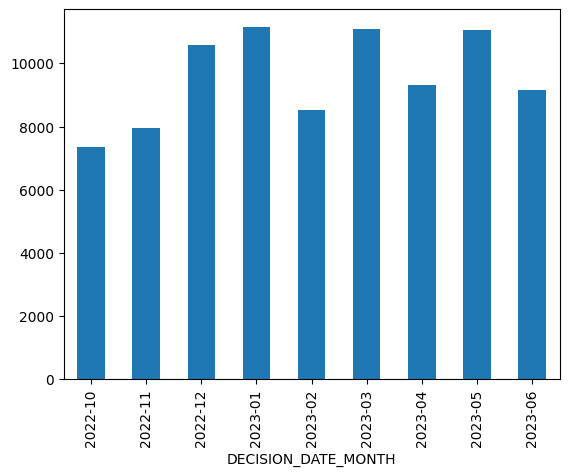

In [12]:
# Plot the Cases status per decision date month
ax = df2.plot(kind="bar")